In [30]:
#Подключение библиотек
import numpy as np #для обработки массивов
import matplotlib.pyplot as plt #для гистограмм, диаграмм
import pandas as pd #для анализа данных
from sklearn.model_selection import train_test_split #для машинного обучения
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns #для изображений и графиков
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [31]:
raw_house = pd.read_csv('data.csv') #Чтение исходных данных .csv из наборов данных
raw_house = raw_house.dropna() #для удаления строк и  столбцов
raw_house.head() #возвращает записи из начала датафрейма

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [32]:
#Создание дубликатов
raw_house_dup = raw_house
raw_house_dup.head() #возвращает записи из начала датафрейма

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


<AxesSubplot:xlabel='price', ylabel='Density'>

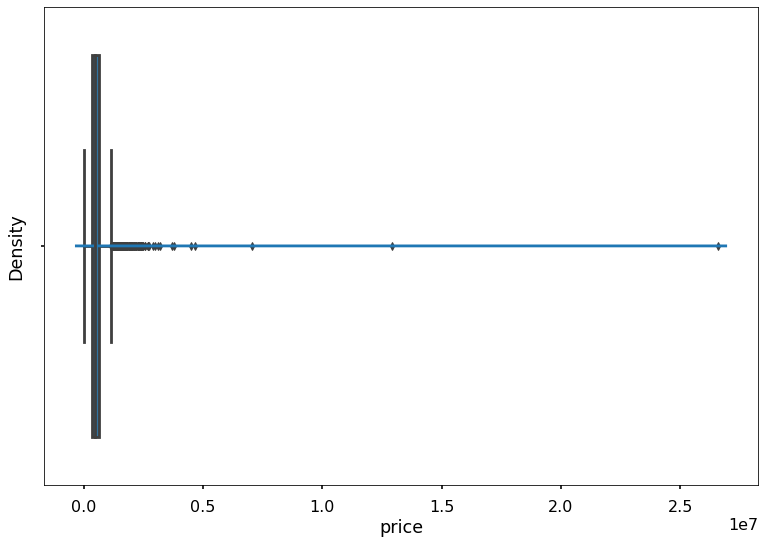

In [33]:
# Проверка выбросов из наборов данных
#Для создания диаграммы воспользуемся функцией boxplot в Seaborn
sns.boxplot(raw_house.price)
#distplot одновременно показывает гистограмму и график плотности распределения
sns.distplot(raw_house.price)

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64
             price  bathrooms  sqft_living  sqft_above  sqft_basement  view
0     3.130000e+05       1.50         1340        1340              0     0
1     2.384000e+06       2.50         3650        3370            280     4
2     3.420000e+05       2.00         1930        1930              0     0
3     4.200000e+05       2.25         2000        1000           1000     0
4     5.500000e+05       2.50         1940        1140            800     0
...            ...        ...          ...         ...            ...   ...
4595  3.081667e+05       1.75         1510        1510              0     0
4596  5.343333e+05       2

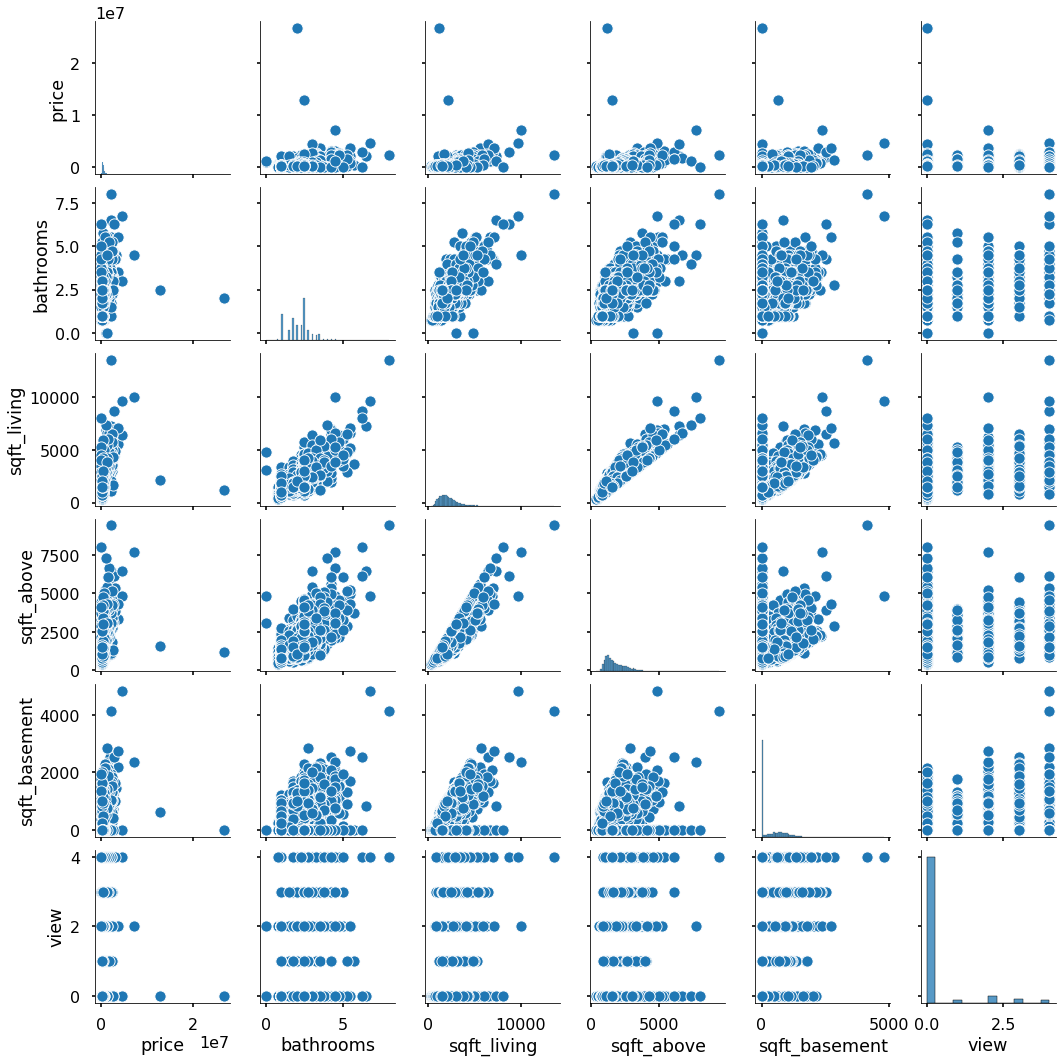

In [34]:
#Изучение корреляции между каждой функцией и целевой переменной в наборах данных

house_data = raw_house

corr_matrix = house_data.corr() #корреляция
print(corr_matrix["price"].sort_values(ascending=False))
house_data = house_data[['price','bathrooms', 'sqft_living','sqft_above', 'sqft_basement','view']]
print(house_data)
#sns.heatmap(house_data.corr(), annot=False)
sns.pairplot(house_data)

In [35]:
house_data.price.describe() #статистические характеристики

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

In [36]:
#Разделение столбцов функций из целевого столбца

final_untouched_data = house_data[-20:]

training_data = house_data[:-20]

feature_data = training_data.drop(['price'], axis=1)
target_data = training_data['price']

X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3206, 5), (1374, 5), (3206,), (1374,))

In [37]:
# Оценка модели путем вычисления MSE прогноза на тестовом наборе данных (X_test)
# RMSE (root mean squared error)- Среднеквадратичная ошибка 
# Например, RMSE = 10. Можно считать, что эффект регрессии в 10 раз отличается от истинного значения в среднем.
# MAE - mean absolute error, т.е. средняя абсолютная (взятая по модулю) ошибка
steps = [('scaler', StandardScaler()),
        ('LinReg', LinearRegression())]

pipeline = Pipeline(steps)

model = LinearRegression()

model_linear = pipeline.fit(X_train, y_train) #обучение 

housing_predictions = model_linear.predict(X_test) 

lin_mse = mean_squared_error(y_test, housing_predictions) 
lin_rmse = np.sqrt(lin_mse) 
print('RMSE: ' , lin_rmse)
lin_mae = mean_absolute_error(y_test, housing_predictions)
print('MAE: ', lin_mae)

RMSE:  257082.98034298787
MAE:  177779.62086776196


RMSE:  310042.1932802789
MAE:  197889.68849556212
Настоящая цена: 282508 | Прогнозируемая цена: 392206.352375
Настоящая цена: 473200 | Прогнозируемая цена: 443301.852342
Настоящая цена: 406062 | Прогнозируемая цена: 332164.495979
Настоящая цена: 282766 | Прогнозируемая цена: 425501.183678
Настоящая цена: 486445 | Прогнозируемая цена: 479372.099592
Настоящая цена: 486895 | Прогнозируемая цена: 475900.883010
Настоящая цена: 430277 | Прогнозируемая цена: 414180.791716
Настоящая цена: 229629 | Прогнозируемая цена: 202862.471847
Настоящая цена: 0 | Прогнозируемая цена: 1093595.158054
Настоящая цена: 182805 | Прогнозируемая цена: 267380.098325
Настоящая цена: 380680 | Прогнозируемая цена: 663878.364013
Настоящая цена: 396166 | Прогнозируемая цена: 469110.577940
Настоящая цена: 252980 | Прогнозируемая цена: 641499.167529
Настоящая цена: 289373 | Прогнозируемая цена: 643488.429438
Настоящая цена: 210614 | Прогнозируемая цена: 412734.047911
Настоящая цена: 308166 | Прогнозируемая цена: 387368.7

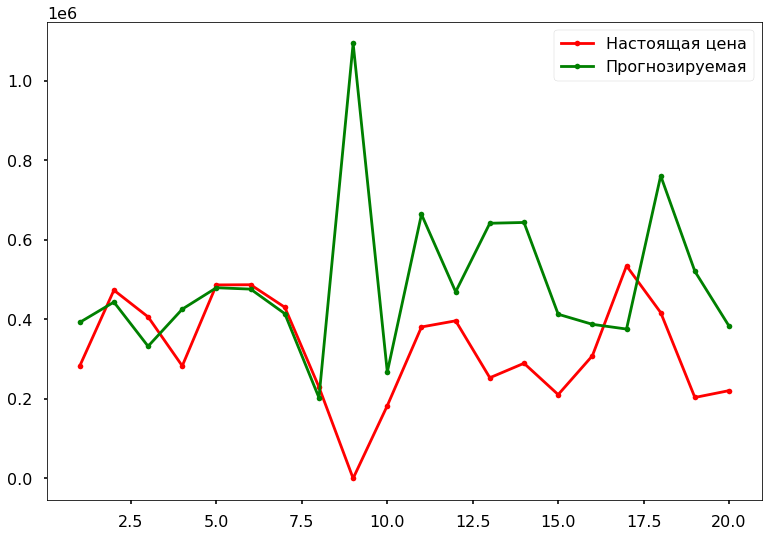

In [40]:
# Предсказывание цены на дом для нетронутых наборов данных,
# использование линейной модели с mae и rmse

feature_final_untouched = final_untouched_data.drop(['price'], axis= 1)
target_final_untouched = final_untouched_data['price']
feature_final_untouched


untouched_data_predictions = model_linear.predict(feature_final_untouched)
untouched_mse = mean_squared_error(target_final_untouched, untouched_data_predictions) 
untouched_rmse = np.sqrt(untouched_mse) 
print('RMSE: ' , untouched_rmse)
untouched_mae = mean_absolute_error(target_final_untouched, untouched_data_predictions)
print('MAE: ', untouched_mae)


# Изменяем конечную цель на массив 
target_final_untouched = np.array(target_final_untouched)

for i in range(len(target_final_untouched)):
    print('Настоящая цена: %d | Прогнозируемая цена: %f' % (target_final_untouched[i], untouched_data_predictions[i]))
    #print('Feature %d: %f' % (i, fs.scores_[i]))
    
x = np.arange(1, target_final_untouched.shape[0]+1)

plt.plot(x, target_final_untouched, marker='.', color='red')
plt.plot(x, untouched_data_predictions, marker='.', color='green')
plt.legend(['Настоящая цена', 'Прогнозируемая'])
plt.show()

Есть одна точка данных, которая показывает огромную разницу, потому что фактическая цена дома равна нулю, а цена дома не может быть равна нулю.

In [45]:
#Проверка значения каждого столбца в наборах данных

#raw_house.info()

print(raw_house_dup[raw_house_dup['price'] == 0].count())
house_with_zero =  raw_house_dup[raw_house_dup['price'] == 0]
house_with_zero[:10]

date             49
price            49
bedrooms         49
bathrooms        49
sqft_living      49
sqft_lot         49
floors           49
waterfront       49
view             49
condition        49
sqft_above       49
sqft_basement    49
yr_built         49
yr_renovated     49
street           49
city             49
statezip         49
country          49
dtype: int64


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
4356,2014-05-05 00:00:00,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
4357,2014-05-05 00:00:00,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4358,2014-05-06 00:00:00,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
4361,2014-05-07 00:00:00,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA
4362,2014-05-07 00:00:00,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,1990,2009,1223-1237 244th Ave NE,Sammamish,WA 98074,USA
4374,2014-05-09 00:00:00,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007,0,39612 254th Ave SE,Enumclaw,WA 98022,USA
4376,2014-05-09 00:00:00,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,1960,2001,216 SW 183rd St,Normandy Park,WA 98166,USA
4382,2014-05-12 00:00:00,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,2006,0,6925 Oakmont Ave SE,Snoqualmie,WA 98065,USA
4383,2014-05-13 00:00:00,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,2013,1923,9235 NE 5th St,Bellevue,WA 98004,USA


Из приведенных выше наборов данных ясно видно, что переменные признаков существуют для нулевой цены дома. Поэтому нам нужно добавить значение для столбца цены.

In [46]:
print('mean : ' ,raw_house_dup['price'].mean())
print('median : ' ,raw_house_dup['price'].median())
print(raw_house_dup['price'].skew()) #возвращает асимметрию набора данных
raw_house_dup['price'].describe()

mean :  551962.9884732141
median :  460943.46153850004
24.790932561757053


count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

In [47]:
#Замена мин значения и макс значения данных 10-м процентилем и 90-м процентилем цены дома.
print(raw_house_dup['price'].quantile(0.10)) #разделение на интервалы
print(raw_house_dup['price'].quantile(0.90)) #разделение на интервалы

raw_house_dup['price'] = np.where(raw_house_dup['price'] <239950, 239950, raw_house_dup['price'])
raw_house_dup['price'] = np.where(raw_house_dup['price'] >900000, 900000, raw_house_dup['price'])
raw_house_dup['price'].skew() #возвращает асимметрию набора данных

239950.0
900000.0


0.5334648632560575

In [48]:
#Замена мин значения и макс значения данных медианой данных
print(raw_house_dup['price'].quantile(0.50)) #разделение на интервалы
print(raw_house_dup['price'].quantile(0.95)) #разделение на интервалы
raw_house_dup['price'].skew() #возвращает асимметрию набора данных
raw_house_dup['price'] = np.where(raw_house_dup['price']> 900000, 460943, raw_house_dup['price'])
raw_house_dup['price'] = np.where(raw_house_dup['price']<= 0, 460943, raw_house_dup['price'])
raw_house_dup['price'].skew() #возвращает асимметрию набора данных

460943.46153850004
900000.0


0.5334648632560575

In [49]:
#Изучение корреляции между каждой функцией и целевой переменной в наборах данных
# и
#Удаление ненужного столбца из наборов данных.

new_house_data = raw_house_dup.drop(['date','street','city','statezip','country'], axis=1) #удаляем
#house_data.info()
#house_data
corr_matrix = new_house_data.corr()
print(corr_matrix["price"].sort_values(ascending=False))
print(new_house_data['price'].skew())
print(new_house_data['price'].describe())

price            1.000000
sqft_living      0.636638
sqft_above       0.562652
bathrooms        0.500425
bedrooms         0.333591
floors           0.295172
view             0.289115
sqft_basement    0.276024
sqft_lot         0.097085
waterfront       0.095776
condition        0.050064
yr_built         0.039824
yr_renovated    -0.063236
Name: price, dtype: float64
0.5334648632560575
count      4600.000000
mean     505260.775882
std      213347.198920
min      239950.000000
25%      322875.000000
50%      460943.461539
75%      654962.500000
max      900000.000000
Name: price, dtype: float64


              price  bathrooms  sqft_living  sqft_above  sqft_basement  \
0     313000.000000       1.50         1340        1340              0   
1     900000.000000       2.50         3650        3370            280   
2     342000.000000       2.00         1930        1930              0   
3     420000.000000       2.25         2000        1000           1000   
4     550000.000000       2.50         1940        1140            800   
...             ...        ...          ...         ...            ...   
4595  308166.666667       1.75         1510        1510              0   
4596  534333.333333       2.50         1460        1460              0   
4597  416904.166667       2.50         3010        3010              0   
4598  239950.000000       2.00         2090        1070           1020   
4599  239950.000000       2.50         1490        1490              0   

      bedrooms  floors  
0          3.0     1.5  
1          5.0     2.0  
2          3.0     1.0  
3          

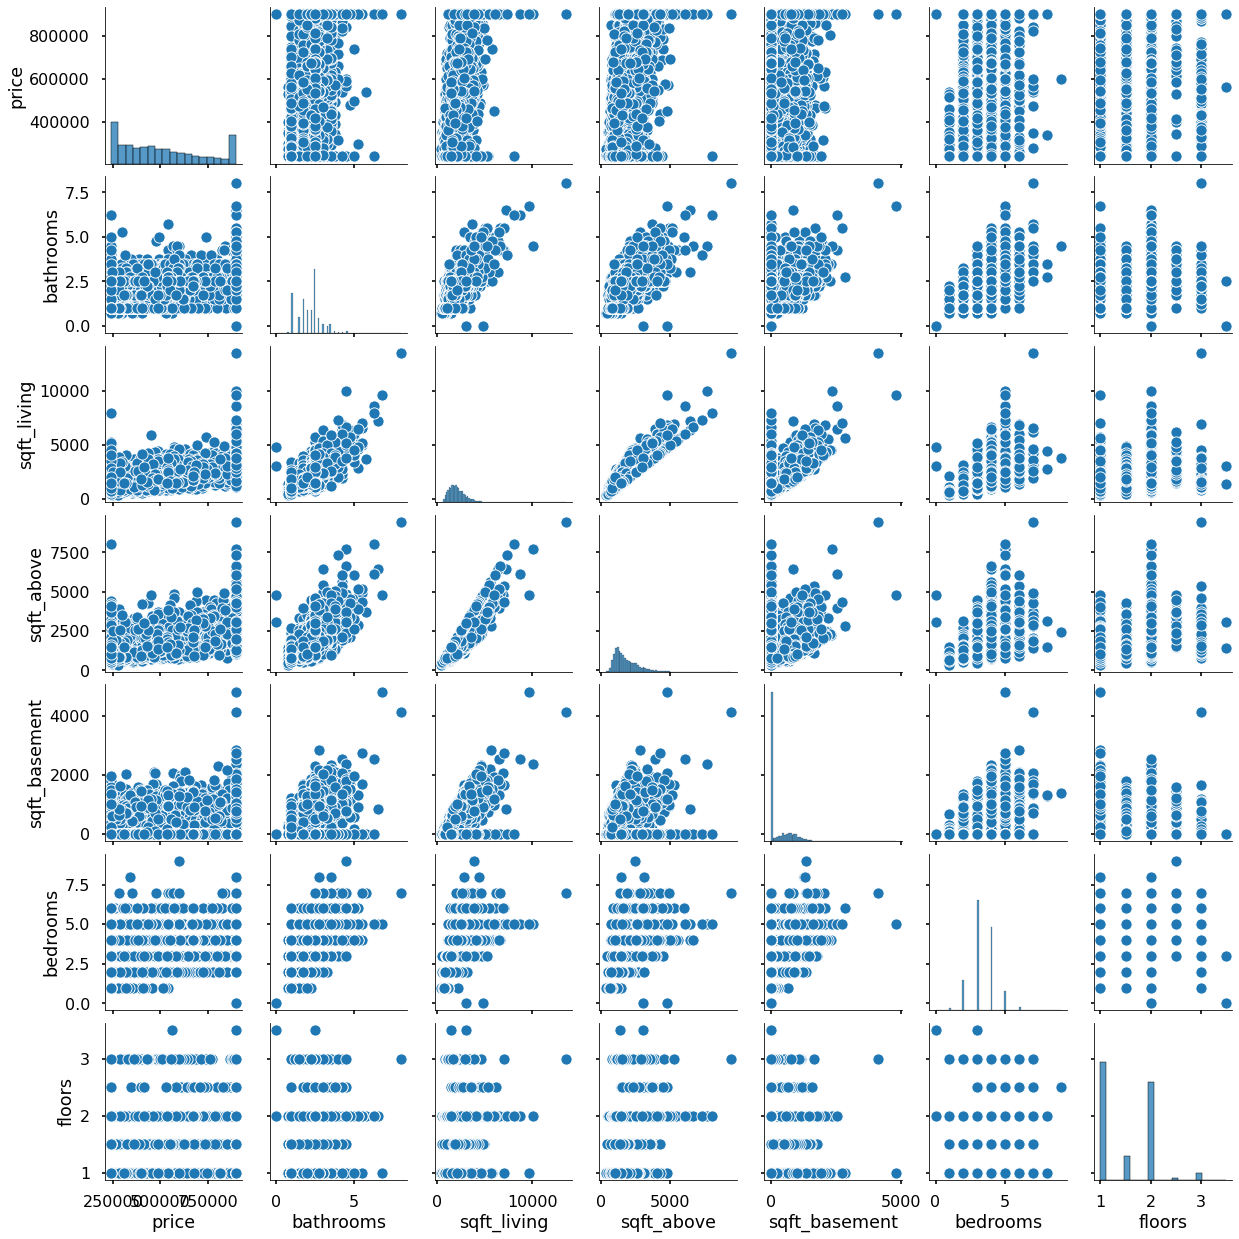

In [52]:
#Из приведенной выше корреляции мы пытаемся выбрать только 6 признаков с самой высокой корреляцией.

new_house_data = new_house_data[['price','bathrooms', 'sqft_living','sqft_above', 'sqft_basement','bedrooms','floors']]
print(new_house_data)
#sns.heatmap(house_data.corr(), annot=False)
sns.pairplot(new_house_data) #показывает отношения между всеми парами переменных

In [53]:
#Разделение столбцов

new_final_untouched_data = new_house_data[-20:]

new_training_data = new_house_data[:-20]
#обучение

new_feature_data = new_training_data.drop(['price'], axis=1)
new_target_data = new_training_data['price']

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_feature_data, new_target_data, test_size = 0.3, random_state = 22)
new_X_train.shape, new_X_test.shape, new_y_train.shape, new_y_test.shape

((3206, 6), (1374, 6), (3206,), (1374,))

In [54]:
# Оценка модели путем вычисления MSE прогноза на тестовом наборе данных (X_test)

new_steps = [('scaler', StandardScaler()),
        ('LinReg', LinearRegression())]
        
new_pipeline = Pipeline(new_steps) #позволяет объединить несколько операций обработки данных в единую модель

new_model_linear = new_pipeline.fit(new_X_train, new_y_train)

new_housing_predictions = new_model_linear.predict(new_X_test) 

new_lin_mse = mean_squared_error(new_y_test, new_housing_predictions) 
new_lin_rmse = np.sqrt(new_lin_mse) 
print('RMSE: ' , new_lin_rmse)
new_lin_mae = mean_absolute_error(new_y_test, new_housing_predictions)
print('MAE: ', new_lin_mae)

RMSE:  162299.1631164432
MAE:  131633.59196031056


RMSE:  182789.54123036392
MAE:  148006.97638823776
Настоящая цена: 282508 | Прогнозируемая цена: 420866.418982
Настоящая цена: 473200 | Прогнозируемая цена: 453422.493208
Настоящая цена: 406062 | Прогнозируемая цена: 386148.235476
Настоящая цена: 282766 | Прогнозируемая цена: 426473.104769
Настоящая цена: 486445 | Прогнозируемая цена: 447869.302942
Настоящая цена: 486895 | Прогнозируемая цена: 483447.683478
Настоящая цена: 430277 | Прогнозируемая цена: 501120.108648
Настоящая цена: 239950 | Прогнозируемая цена: 316307.267959
Настоящая цена: 239950 | Прогнозируемая цена: 653240.505234
Настоящая цена: 239950 | Прогнозируемая цена: 341529.548269
Настоящая цена: 380680 | Прогнозируемая цена: 573203.249262
Настоящая цена: 396166 | Прогнозируемая цена: 469640.398074
Настоящая цена: 252980 | Прогнозируемая цена: 561115.389500
Настоящая цена: 289373 | Прогнозируемая цена: 578789.742382
Настоящая цена: 239950 | Прогнозируемая цена: 454150.477275
Настоящая цена: 308166 | Прогнозируемая цена: 398

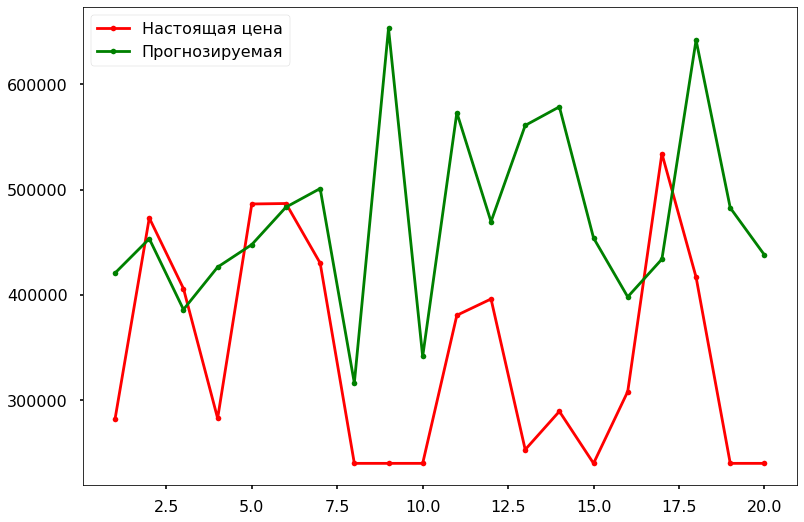

In [55]:
# Предсказываем цену дома

new_feature_final_untouched = new_final_untouched_data.drop(['price'], axis= 1)
new_target_final_untouched = new_final_untouched_data['price']
new_feature_final_untouched
#target_final_untouched

new_untouched_data_predictions = new_model_linear.predict(new_feature_final_untouched)
new_untouched_mse = mean_squared_error(new_target_final_untouched, new_untouched_data_predictions) 
new_untouched_rmse = np.sqrt(new_untouched_mse) 
print('RMSE: ' , new_untouched_rmse)
new_untouched_mae = mean_absolute_error(new_target_final_untouched, new_untouched_data_predictions)
print('MAE: ', new_untouched_mae)


# Изменяем конечную цель на массив
new_target_final_untouched = np.array(new_target_final_untouched)

for i in range(len(new_target_final_untouched)):
    print('Настоящая цена: %d | Прогнозируемая цена: %f' % (new_target_final_untouched[i], new_untouched_data_predictions[i]))
    #print('Feature %d: %f' % (i, fs.scores_[i]))
    
new_x = np.arange(1, new_target_final_untouched.shape[0]+1)


target_slope, target_intercept = np.polyfit(new_x, new_target_final_untouched, 1)
prediction_slope, prediction_intercept = np.polyfit(new_x, new_untouched_data_predictions, 1)
#y_target = target_slope * new_x + target_intercept
#y_prediction = prediction_slope * new_x + prediction_intercept


plt.plot(new_x, new_target_final_untouched, marker='.', color='red')
plt.plot(new_x, new_untouched_data_predictions, marker='.', color='green')
#plt.plot(new_x, y_target, color='red')
#plt.plot(new_x, y_prediction, color='green')
plt.legend(['Настоящая цена', 'Прогнозируемая'])
plt.show()